In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [2]:
with open("../results/results.json", "r") as f:
    results = json.load(f)

In [13]:
def plot_confusion_matrix(cm_array, title, agent_name, first):
    if first:
        num = 'first'
    else:
        num = 'last'
    plt.figure(figsize=(6, 5))
    plt.imshow(cm_array, cmap="Blues")
    
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.xticks([0, 1], ["Positive", "Negative"])
    plt.yticks([0, 1], ["Positive", "Negative"])

    # Print numbers inside cells
    for i in range(2):
        for j in range(2):
            plt.text(
                j, i, format(cm_array[i, j], ','),
                ha="center", va="center",
                fontsize=14, color="black"
            )

    plt.colorbar()
    plt.tight_layout()
    plt.savefig(f'../results/{agent_name}/{agent_name}_cm_{num}.png')
    plt.show()

**Random Agent**
---

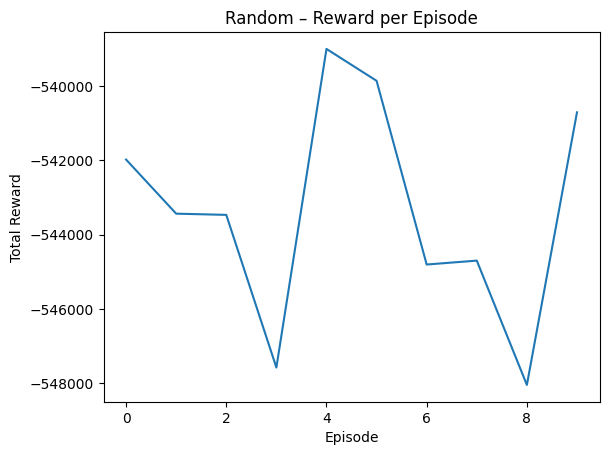

<Figure size 640x480 with 0 Axes>

In [9]:
agent_name = "Random"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.show()
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')

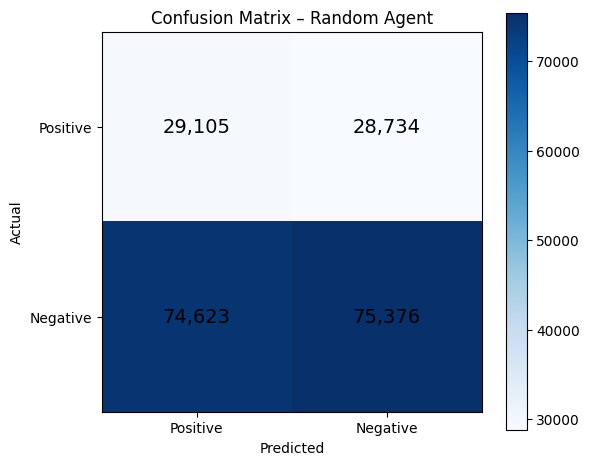

In [20]:
agent_name = "Random"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Random Agent", agent_name=agent_name, first=False)

**Rule Based Agent**
---

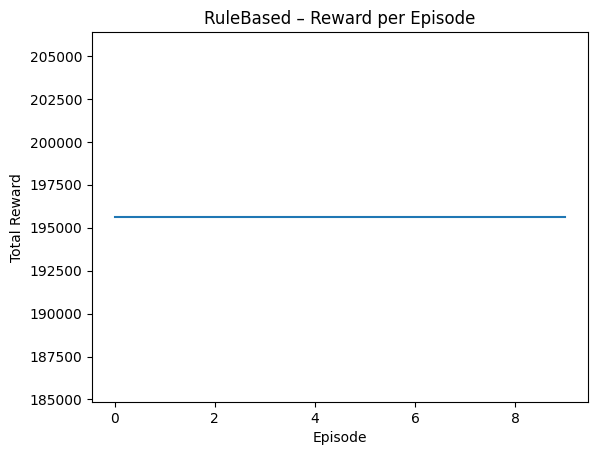

In [17]:
agent_name = "RuleBased"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"] * 10

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()


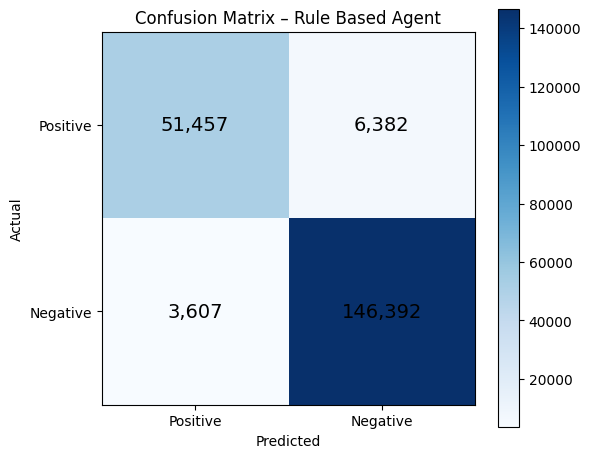

In [19]:
agent_name = "RuleBased"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Rule Based Agent", agent_name=agent_name, first=False)

**Q-Learning Agent**
---

Reward Curve

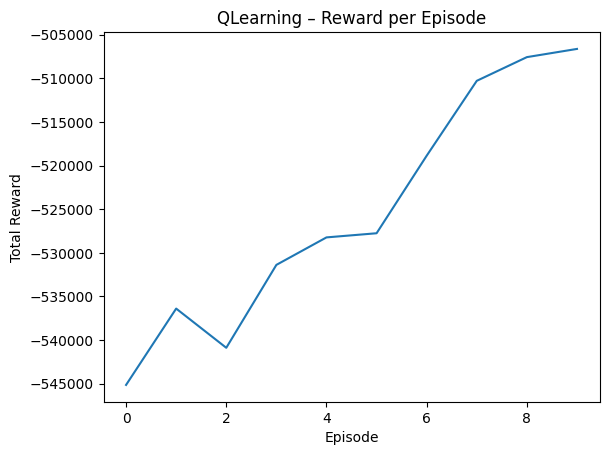

In [18]:
agent_name = "QLearning"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()

Confusion Matrix - First Episode

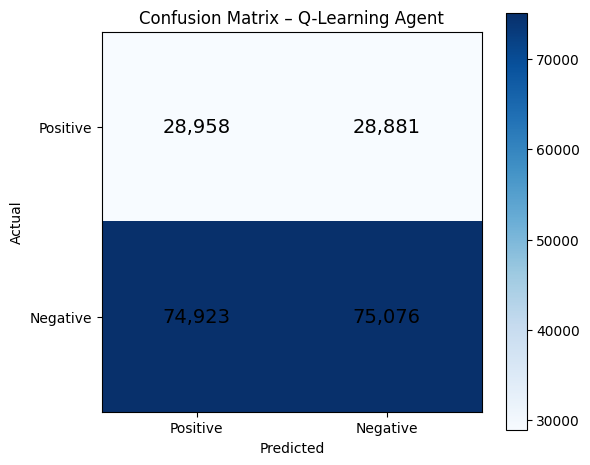

In [21]:
agent_name = "QLearning"
cm = results[agent_name]["summary"]["first"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Q-Learning Agent", agent_name=agent_name, first=True)

Confusion Matrix - Last Episode

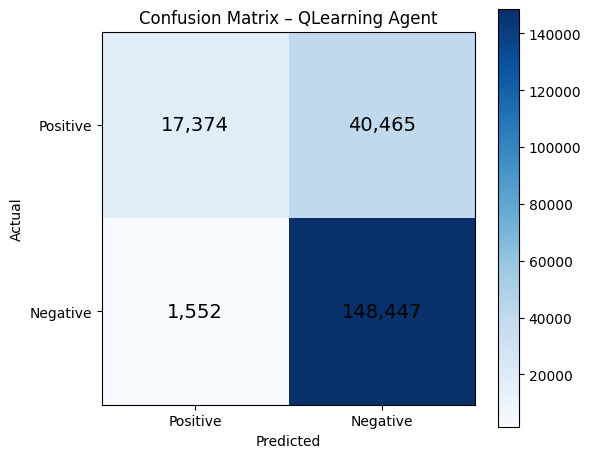

In [22]:
agent_name = "QLearning"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="QLearning Agent", agent_name=agent_name, first=False)

Metrics Comparison

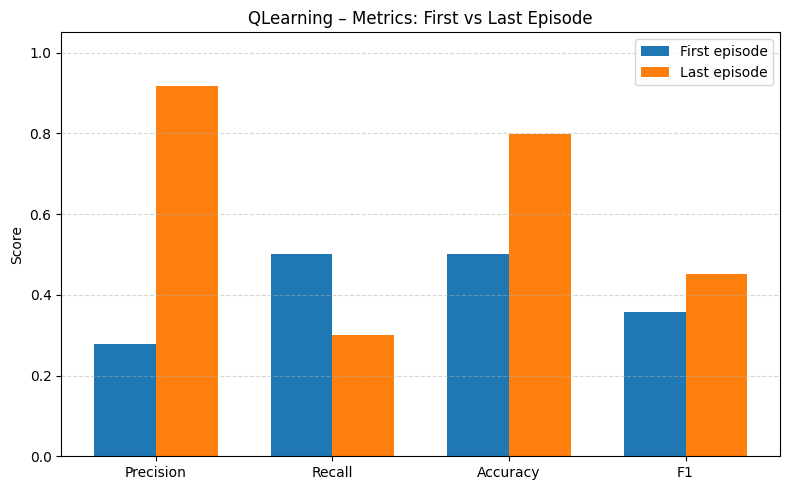

In [23]:
agent_name = "QLearning"

first_metrics = results[agent_name]["summary"]["first"]
last_metrics  = results[agent_name]["summary"]["last"]

metric_names = ["precision", "recall", "accuracy", "f1"]

first_values = [first_metrics[m] for m in metric_names]
last_values  = [last_metrics[m]  for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, first_values, width, label="First episode")
plt.bar(x + width/2, last_values,  width, label="Last episode")

plt.xticks(x, [m.capitalize() for m in metric_names])
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title(f"{agent_name} – Metrics: First vs Last Episode")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'../results/{agent_name}/metrics_comparison.png')
plt.show()

**SARSA**
---

Reward Curve

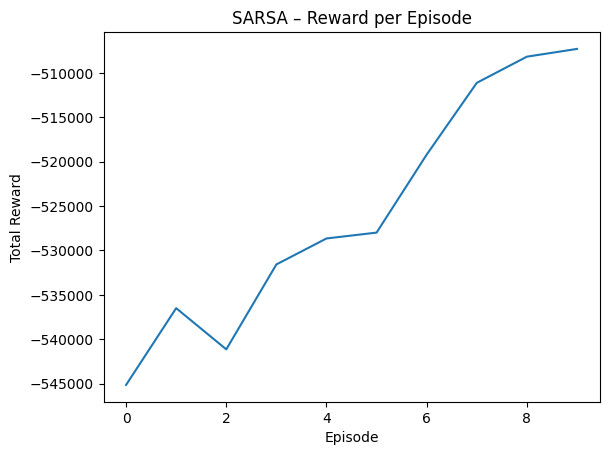

In [24]:
agent_name = "SARSA"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()

Confusion Matrix - First Episode

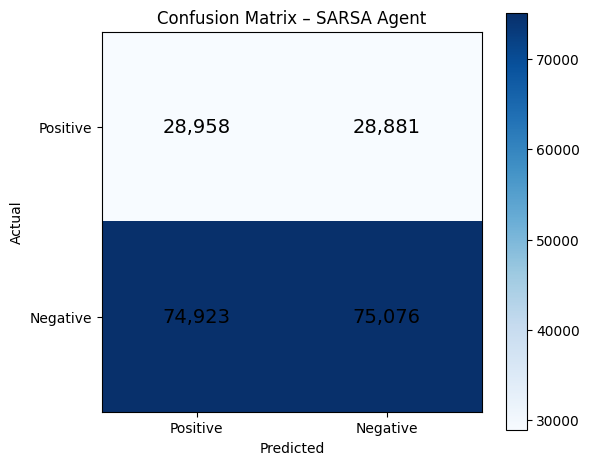

In [25]:
agent_name = "SARSA"
cm = results[agent_name]["summary"]["first"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="SARSA Agent", agent_name=agent_name, first=True)

Confusion Matrix - Last Episode

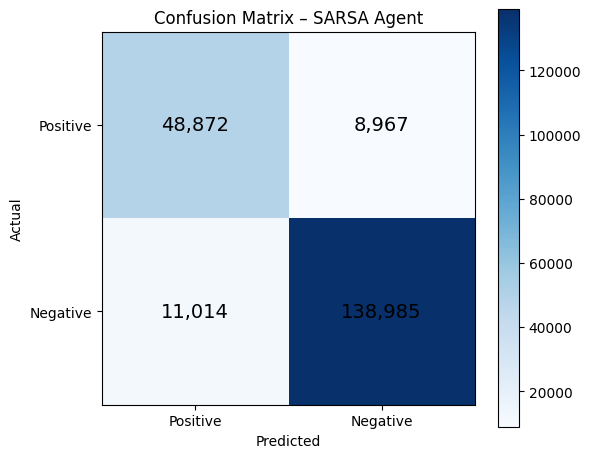

In [26]:
agent_name = "SARSA"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="SARSA Agent", agent_name=agent_name, first=False)

Metrics Comparison

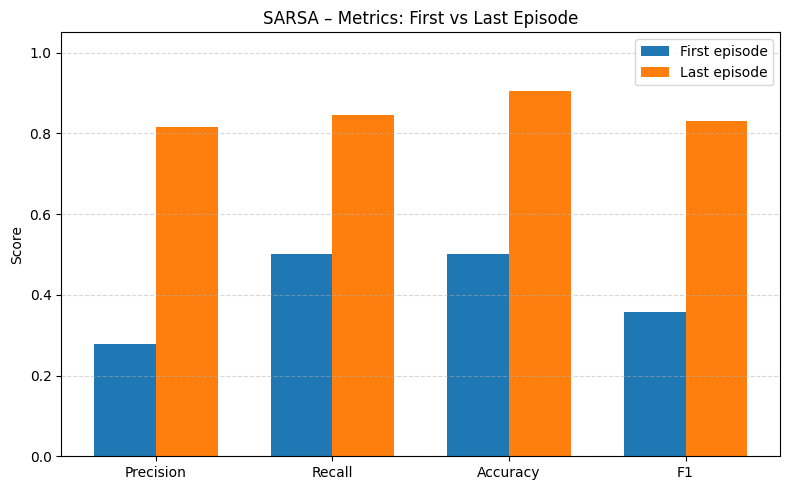

In [27]:
agent_name = "SARSA"

first_metrics = results[agent_name]["summary"]["first"]
last_metrics  = results[agent_name]["summary"]["last"]

metric_names = ["precision", "recall", "accuracy", "f1"]

first_values = [first_metrics[m] for m in metric_names]
last_values  = [last_metrics[m]  for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, first_values, width, label="First episode")
plt.bar(x + width/2, last_values,  width, label="Last episode")

plt.xticks(x, [m.capitalize() for m in metric_names])
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title(f"{agent_name} – Metrics: First vs Last Episode")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'../results/{agent_name}/metrics_comparison.png')
plt.show()